In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa
import os
import math
import shutil
import pandas as pd
import random

In [ ]:
BASE_PATH = '/kaggle/input/asvpoof-2019-dataset/LA/LA'

# change here
train_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt', sep=" ", header=None)

train_df.columns =['speaker_id','filename','system_id','null','class_name']
train_df.drop(columns=['null'],inplace=True)

#change here
train_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_train/flac/'+train_df.filename+'.flac'

train_df['target'] = (train_df.class_name=='spoof').astype('int32')
print('len Train', len(train_df))
train_df.head()

In [ ]:
playpath = f'{BASE_PATH}/ASVspoof2019_LA_dev/flac/LA_D_1001095.flac'
y, sr = librosa.load(playpath, sr=16000)
duration = len(y) / sr
print(duration)

In [ ]:
#change here
output_folder_0 = './audio_train/0'  # for bonafide
output_folder_1 = './audio_train/1'  # for spoof

if not os.path.exists(output_folder_0):
    os.makedirs(output_folder_0)

if not os.path.exists(output_folder_1):
    os.makedirs(output_folder_1)

for index, row in train_df.iterrows():
    source_filepath = row['filepath']

    #change here
    target_folder = f'./audio_train/{row["target"]}'
    
    target_filepath = os.path.join(target_folder, os.path.basename(source_filepath))
    
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    shutil.copy(source_filepath, target_filepath)

In [ ]:
nbonafide = len(os.listdir(output_folder_0))
nspoof = len(os.listdir(output_folder_1))

print(f'Number of Bonafide(0) Data {nbonafide}')
print(f'Number of Spoof Data(1) {nspoof}')

In [ ]:
#change here
folder_path = './audio_train/1' 

files = os.listdir(folder_path)

total_files = len(files)

#to remove imbalance
num_files_to_delete = nspoof-nbonafide

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

ndelete=0
for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    try:
        os.remove(file_path)
        # print(f"{file_name} Deleted.")
        ndelete += 1
    except Exception as e:
        print(f"Error while deleting: {e}")

print(f'{ndelete} files deleted from {folder_path}')

In [ ]:
print(f'Updated Number of files:')
print(f'Number of Bonafide(0) Data {len(os.listdir(output_folder_0))}')
print(f'Number of Spoof Data(1) {len(os.listdir(output_folder_1))}')

In [ ]:
### for creating folders for dev and eval
# change here
dev_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt', sep=" ", header=None)

dev_df.columns =['speaker_id','filename','system_id','null','class_name']
dev_df.drop(columns=['null'],inplace=True)

#change here
dev_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_dev/flac/'+dev_df.filename+'.flac'

dev_df['target'] = (dev_df.class_name=='spoof').astype('int32')
print('len dev', len(dev_df))
dev_df.head()

#change here
output_folder_0 = './audio_dev/0'  # for bonafide
output_folder_1 = './audio_dev/1'  # for spoof

if not os.path.exists(output_folder_0):
    os.makedirs(output_folder_0)

if not os.path.exists(output_folder_1):
    os.makedirs(output_folder_1)

for index, row in dev_df.iterrows():
    source_filepath = row['filepath']

    #change here
    target_folder = f'./audio_dev/{row["target"]}'
    
    target_filepath = os.path.join(target_folder, os.path.basename(source_filepath))
    
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    shutil.copy(source_filepath, target_filepath)

nbonafide = len(os.listdir(output_folder_0))
nspoof = len(os.listdir(output_folder_1))

print(f'Number of Bonafide(0) Data {nbonafide}')
print(f'Number of Spoof Data(1) {nspoof}')

#change here
folder_path = './audio_dev/1' 

files = os.listdir(folder_path)

total_files = len(files)

#to remove imbalance
num_files_to_delete = nspoof-nbonafide

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

ndelete=0
for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    try:
        os.remove(file_path)
        # print(f"{file_name} Deleted.")
        ndelete += 1
    except Exception as e:
        print(f"Error while deleting: {e}")

print(f'{ndelete} files deleted from {folder_path}')

print(f'Updated Number of files:')
print(f'Number of Bonafide(0) Data {len(os.listdir(output_folder_0))}')
print(f'Number of Spoof Data(1) {len(os.listdir(output_folder_1))}')

In [ ]:
### for creating folders for eval and dev
# change here
eval_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt', sep=" ", header=None)

eval_df.columns =['speaker_id','filename','system_id','null','class_name']
eval_df.drop(columns=['null'],inplace=True)

#change here
eval_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_eval/flac/'+eval_df.filename+'.flac'

eval_df['target'] = (eval_df.class_name=='spoof').astype('int32')
print('len eval', len(eval_df))
eval_df.head()

#change here
output_folder_0 = './audio_eval/0'  # for bonafide
output_folder_1 = './audio_eval/1'  # for spoof

if not os.path.exists(output_folder_0):
    os.makedirs(output_folder_0)

if not os.path.exists(output_folder_1):
    os.makedirs(output_folder_1)

for index, row in eval_df.iterrows():
    source_filepath = row['filepath']

    #change here
    target_folder = f'./audio_eval/{row["target"]}'
    
    target_filepath = os.path.join(target_folder, os.path.basename(source_filepath))
    
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    shutil.copy(source_filepath, target_filepath)

nbonafide = len(os.listdir(output_folder_0))
nspoof = len(os.listdir(output_folder_1))

print(f'Number of Bonafide(0) Data {nbonafide}')
print(f'Number of Spoof Data(1) {nspoof}')

#change here
folder_path = './audio_eval/1' 

files = os.listdir(folder_path)

total_files = len(files)

#to remove imbalance
num_files_to_delete = nspoof-nbonafide

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

ndelete=0
for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    try:
        os.remove(file_path)
        # print(f"{file_name} Deleted.")
        ndelete += 1
    except Exception as e:
        print(f"Error while deleting: {e}")

print(f'{ndelete} files deleted from {folder_path}')

print(f'Updated Number of files:')
print(f'Number of Bonafide(0) Data {len(os.listdir(output_folder_0))}')
print(f'Number of Spoof Data(1) {len(os.listdir(output_folder_1))}')

In [ ]:
TRAIN_DATASET_PATH = "/kaggle/working/audio_train"
VAL_DATASET_PATH = "/kaggle/working/audio_dev"
TEST_DATASET_PATH = "/kaggle/working/audio_eval"
TRAIN_JSON_PATH = "data_train.json"
VAL_JSON_PATH = "data_val.json"
TEST_JSON_PATH = "data_test.json"
SAMPLE_RATE = 16000
TRACK_DURATION = 4 
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=1024, hop_length=512, num_segments=5):

    
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        if dirpath is not dataset_path:

            
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

           
            for f in filenames:

                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                
                for d in range(num_segments):
                    
                    start = samples_per_segment * d
                    finish = start + samples_per_segment
                    
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [ ]:
save_mfcc(TRAIN_DATASET_PATH, TRAIN_JSON_PATH, num_segments=2)

In [ ]:
save_mfcc(VAL_DATASET_PATH, VAL_JSON_PATH, num_segments=2)

### Run from here

In [275]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa
import os
import math
import shutil
import pandas as pd
import random

In [276]:
DATA_PATH = "./data_train.json"


def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    print(len(X))
    return X, y

def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    print(len(X))
    print(len(X_train))
    print(len(X_test))
    print(len(X_validation))
    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))

    return model


In [277]:
TRN_PATH = '/kaggle/input/pre-processed-data/data_train.json'
V_PATH = '/kaggle/input/pre-processed-data/data_val.json'
EVAL_PATH = '/kaggle/input/pre-processed-data/data_test.json'

In [300]:
x_t, y_t = load_data(TRN_PATH)
x_v, y_v = load_data(V_PATH)
X_train = np.concatenate((x_t, x_v), axis=0)
y_train = np.concatenate((y_t, y_v), axis=0)
# get train, validation, test splits
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.175, random_state=42)
print(len(X_train))
print(len(X_validation))

6062
6182
10101
2143


In [301]:
TestX, TestY = load_data("/kaggle/input/pre-processed-data/data_test.json")

16037


In [304]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

def build_CNN_model(input_shape):
    model = keras.Sequential()

    # CNN layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape,
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.05))

    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.05))

    model.add(layers.Conv2D(64, (2, 2), activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.15))

    # Reshape for LSTM
    model.add(layers.Reshape((-1,64)))

    # LSTM layer
    model.add(layers.LSTM(128, return_sequences=False))

    # Dense layers
    model.add(layers.Dense(128, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.45))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


In [305]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# create network
input_shape = (X_train.shape[1], X_train.shape[2],1) # 130, 13
model = build_CNN_model(input_shape)

    
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        verbose=1,
        patience=5,
        mode='min',
        restore_best_weights=True,
    )
model.compile(optimizer=optimiser,
          loss='binary_crossentropy',
          metrics=['accuracy', 
                   keras.metrics.Recall()]
             )

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30,callbacks=[early_stopping],
)

# evaluate model on test set
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
# print('\nTest accuracy:', test_acc)

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_105 (Conv2D)                  │ (None, 61, 11, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_105 (MaxPooling2D)     │ (None, 31, 6, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_116              │ (None, 31, 6, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_143 (Dropout)                │ (None, 31, 6, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_106 (Conv2D)                  │ (None, 29, 4, 32)           │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_106 (MaxPooling2D)     │ (None, 15, 2, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_117              │ (None, 15, 2, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_144 (Dropout)                │ (None, 15, 2, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_107 (Conv2D)                  │ (None, 14, 1, 64)           │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_107 (MaxPooling2D)     │ (None, 7, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_118              │ (None, 7, 1, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_145 (Dropout)                │ (None, 7, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_28 (Reshape)                 │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_146 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,793 (522.63 KB)

 Trainable params: 133,537 (521.63 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/30


E0000 00:00:1751489337.857270      35 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_36_1/dropout_143_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


316/316 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6684 - loss: 0.8000 - recall_15: 0.7552 - val_accuracy: 0.8101 - val_loss: 0.5723 - val_recall_15: 0.7541
Epoch 2/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8224 - loss: 0.5565 - recall_15: 0.7764 - val_accuracy: 0.8539 - val_loss: 0.4955 - val_recall_15: 0.7695
Epoch 3/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8523 - loss: 0.4748 - recall_15: 0.8123 - val_accuracy: 0.8717 - val_loss: 0.4291 - val_recall_15: 0.8361
Epoch 4/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8795 - loss: 0.4305 - recall_15: 0.8585 - val_accuracy: 0.8815 - val_loss: 0.3986 - val_recall_15: 0.8930
Epoch 5/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8827 - loss: 0.4061 - recall_15: 0.8695 - val_accuracy: 0.8852 - val_loss: 0.3777 - val_recall_15: 0.8881
Epoch 6/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8997 - loss: 0.3650 - recall_15: 0.8917 - val_accuracy: 0.8885 - val_loss: 0.3

In [306]:
model.save("/kaggle/working/audio_cnn.h5")

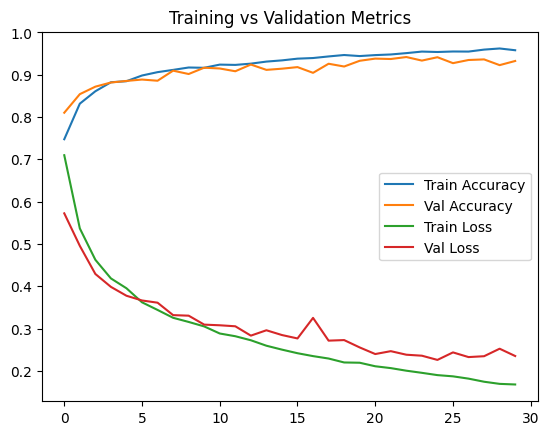

In [307]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Metrics")
plt.show()

In [308]:
def save_mfcc_test(dataset_path, json_path, num_mfcc=13, n_fft=1024, hop_length=512, num_segments=5):

    MAX_SAMPLES = SAMPLES_PER_TRACK
    
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        if dirpath is not dataset_path:

            
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

           
            for f in filenames:

                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                for d in range(num_segments):
                    
                    start = samples_per_segment * d
                    finish = start + samples_per_segment
                    
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [309]:
#save_mfcc_test(TEST_DATASET_PATH, TEST_JSON_PATH, num_segments=2)

In [310]:
test_loss, test_acc, test_recall = model.evaluate(TestX, TestY, verbose=2)
print('\nTest accuracy:', test_acc)

502/502 - 2s - 4ms/step - accuracy: 0.8141 - loss: 0.7174 - recall_15: 0.6839

Test accuracy: 0.8141173720359802


502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


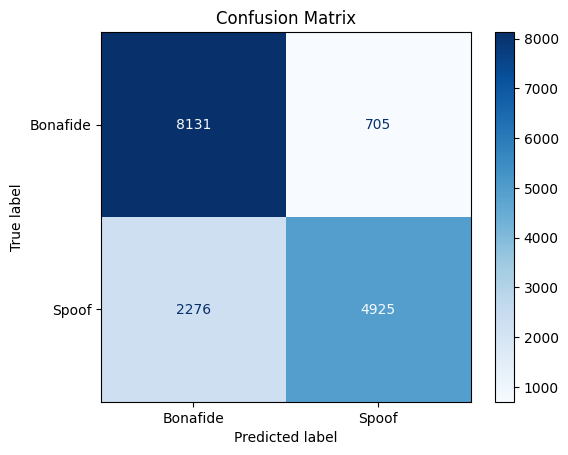

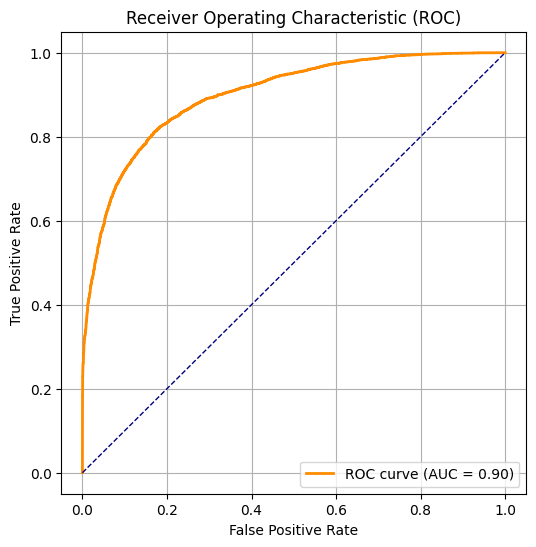

AUC Score: 0.8990


In [311]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns

# 2️⃣ Predict probabilities using your trained model
y_pred_probs = model.predict(TestX)  # shape: (num_samples,)

# 3️⃣ Convert probabilities to class labels
threshold = 0.5
y_pred = (y_pred_probs >= threshold).astype(int)

# 4️⃣ Confusion Matrix
cm = confusion_matrix(TestY, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bonafide", "Spoof"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 5️⃣ ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(TestY, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC Score: {roc_auc_score(TestY, y_pred_probs):.4f}")

In [312]:
# Compute FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(TestY, y_pred_probs)
fnr = 1 - tpr  # False Negative Rate

# Find the point where FPR and FNR are closest
eer_threshold_index = np.nanargmin(np.abs(fpr - fnr))
eer = (fpr[eer_threshold_index] + fnr[eer_threshold_index]) / 2
eer_threshold = thresholds[eer_threshold_index]

print(f"Equal Error Rate (EER): {eer:.4f}")
print(f"EER Threshold: {eer_threshold:.4f}")

from sklearn.metrics import f1_score

# Use thresholded predictions
f1 = f1_score(TestY, y_pred)  # or y_pred_eer if using EER threshold

print(f"F1 Score: {f1:.4f}")

Equal Error Rate (EER): 0.1800
EER Threshold: 0.1272
F1 Score: 0.7677
